### ***HEART DISEASE PREDICTION***

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


In [ ]:
# Load dataset from Google Drive (ID taken from project PDF)
url = "https://drive.google.com/uc?id=1k3Yhgzrgzl9CbdGXuZvK7WgbZ8kVx56I"
data = pd.read_csv(url)

# Show first few rows
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print("Shape of dataset:", data.shape)

print("\nInfo:")
print(data.info())

print("\nMissing values per column:")
print(data.isnull().sum())

print("\nStatistical summary:")
print(data.describe())


Shape of dataset: (303, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope      

In [ ]:
# Handle numeric missing values (median)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

# Handle categorical missing values (mode)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# One-hot encode important categorical columns if present (e.g., cp, thal)
cols_to_encode = [col for col in ['cp', 'thal'] if col in data.columns]
data = pd.get_dummies(data, columns=cols_to_encode, drop_first=True)

print("Missing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
target      0
cp_1        0
cp_2        0
cp_3        0
thal_1      0
thal_2      0
thal_3      0
dtype: int64


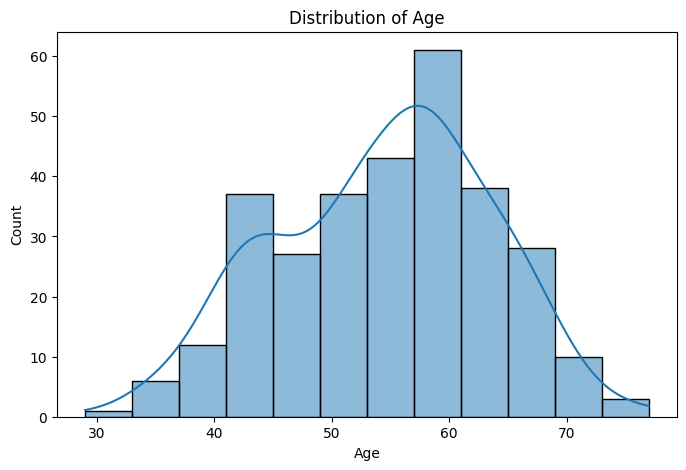

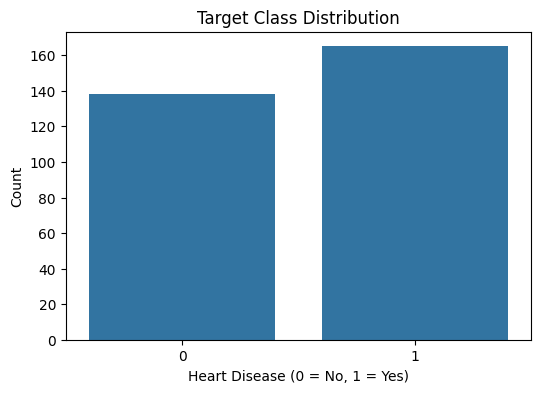

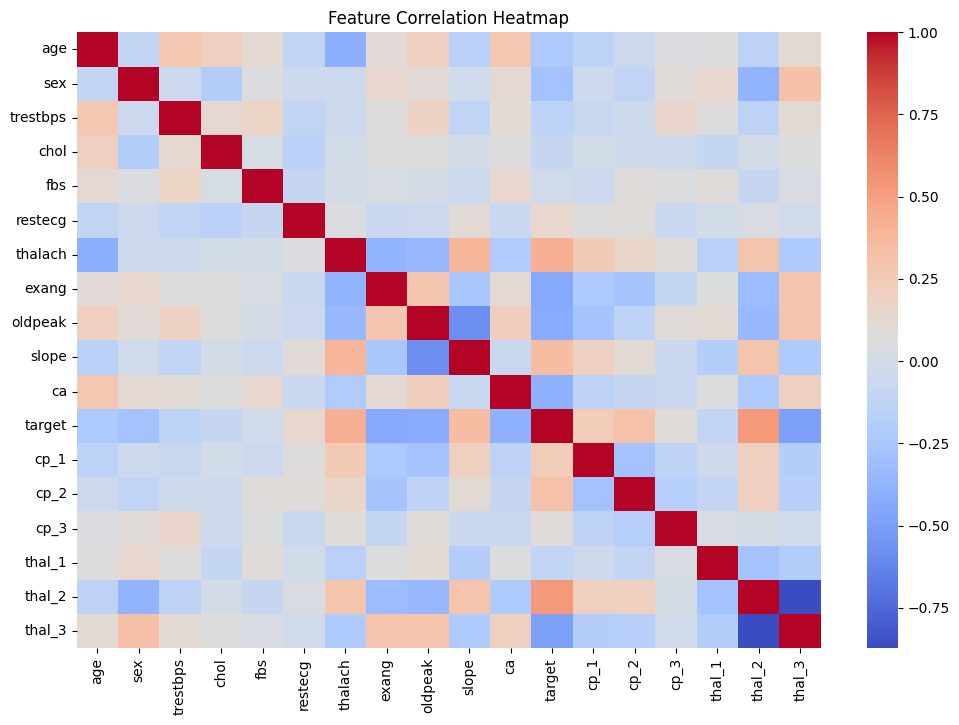

In [ ]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Target distribution (if column exists)
if 'target' in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', data=data)
    plt.title('Target Class Distribution')
    plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9016393442622951

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Decision Tree Accuracy: 0.7868852459016393

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

Random Forest Accuracy: 0.819672131147541

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.78      0.

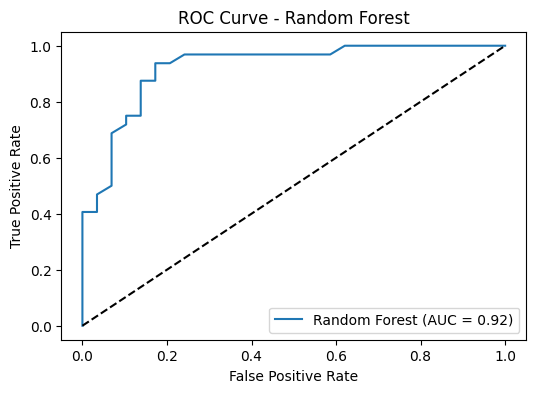

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# ROC-AUC for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob_rf)
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

print("ROC-AUC (Random Forest):", auc)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()
